# Prueba Tecnica: Problema Inmobiliario

### (o) Importe de librerias

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [124]:
import statsmodels.api as sm
import math

In [125]:
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [126]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [436]:
from sklearn.linear_model import LassoCV

In [619]:
from sklearn import svm

In [490]:
import pyearth

In [784]:
pip install openpyxl

     -------------------------------------- 242.1/242.1 kB 1.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [785]:
import openpyxl

### (i) Lectura de los archivos

In [751]:
bd_train = pd.read_csv('bd_train.csv')

In [534]:
 bd_test =pd.read_csv('bd_test.csv')

### (ii) Información general de los datos

In [536]:
bd_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1576 entries, 0 to 1575
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   precio       1576 non-null   float64
 1   metros2      1576 non-null   int64  
 2   anyo         1576 non-null   int64  
 3   banyo        1576 non-null   int64  
 4   Sp           1576 non-null   int64  
 5   Sm           1576 non-null   int64  
 6   calefaccion  1576 non-null   int64  
 7   cocina       1576 non-null   int64  
 8   situacion    1576 non-null   int64  
dtypes: float64(1), int64(8)
memory usage: 110.9 KB


In [537]:
bd_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393 entries, 0 to 392
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   metros2      393 non-null    int64
 1   anyo         393 non-null    int64
 2   banyo        393 non-null    int64
 3   Sp           393 non-null    int64
 4   Sm           393 non-null    int64
 5   calefaccion  393 non-null    int64
 6   cocina       393 non-null    int64
 7   situacion    393 non-null    int64
dtypes: int64(8)
memory usage: 24.7 KB


La revisión general de loss datos de test y train sugiere que no hay datos nulos. Hay 9 variables en bd_train y 8 variables en el bd_test. En el bd_test todos son variables int64, mientras que en el bd_train la variable precio es float64. La gran diferencia es que bc_train tiene Precio que es considerada la variable dependiente de todas las demas. En otras palabras Precio es el vector Y, las otras 8 variables formaran la matrix X.

### (iii) Descripción estadística de los datos

#### 1. Parametros descriptivos

In [538]:
 desc = bd_train.describe()
 desc.round(2)

,precio,metros2,anyo,banyo,Sp,Sm,calefaccion,cocina,situacion
count,1576.00,1576.00,1576.00,1576.00,1576.00,1576.00,1576.0,1576.00,1576.00
mean,1627957.87,67.58,1978.68,0.28,0.08,0.02,0.2,0.08,2.20
std,758564.55,20.68,28.97,0.45,0.27,0.15,0.4,0.28,0.57
min,203400.00,30.00,1920.00,0.00,0.00,0.00,0.0,0.00,1.00
25%,1088400.00,53.00,1964.00,0.00,0.00,0.00,0.0,0.00,2.00
50%,1477000.00,67.00,1987.00,0.00,0.00,0.00,0.0,0.00,2.00
75%,2044600.00,81.00,2002.00,1.00,0.00,0.00,0.0,0.00,3.00
max,5739800.00,120.00,2018.00,1.00,1.00,1.00,1.0,1.00,3.00


In [797]:
skewVal = bd_train.skew(axis = 0)
skewVal

precio         1.009362
metros2        0.250030
anyo          -0.913279
banyo          0.995974
Sp             3.053514
Sm             6.592245
calefaccion    1.532539
cocina         3.038182
situacion     -0.001102
dtype: float64

En este set de datos la unica variable que tiene una distribucion simetrica (aproximadamente normal) es 'metros2'. Se podria decir que 'situacion' tambien tiene una distribucion simetrica, con la gran mayoria de sus datos centrados en la categoria 2.

La variable 'anyo' tienen asimetria negativa (<0) eso quiere decir que tiene datos atipicos en la cola izquierda de su histograma.

Las demas variables tienen asimetrica positiva (>0) eso quiere decir que sus datos atipicos estan a la derecha de su histograma. Es importante revisar porque las variables categoricas tienen esta asimetria, esto sugiere un desbalance importante en los datos estudiados, priorizando una categoria mas que la otra.

In [798]:
kurVal = bd_train.kurt(axis = 0)
kurVal

precio          1.436822
metros2        -0.523493
anyo           -0.403638
banyo          -1.009317
Sp              7.333254
Sm             41.510374
calefaccion     0.349118
cocina          7.239733
situacion      -0.237006
dtype: float64

En este dataset se evidencia que las variables categoricas Sp, Sm y Cocina tienen una alta kurtosis por lo que tienen una presencia importante de datos atipicos (outliers) en las colas de su distribucion. Situacion que evidencia ahun mas la complejidad de los datos y su posible problema de balanceo.

Las demas variables excepto precio tienen una kurtosis negativa, especialmente banyo lo que sugiere que existe mas de una poblacion o cluster de datos en esta variable.

En el caso de la variable precios la kurtosis (>1) confirma la existencia de datos atipicos (que pueden referirse a los precios mas caros del mercado). 

#### 2. Escalamiento Estandar de los datos

In [539]:
scaler = StandardScaler()
bd_train_scale = scaler.fit_transform(bd_train)
# Se valida que dan los mismos valores

In [540]:
bd_train_scale

array([[-0.318, -0.851,  0.805, ..., -0.494, -0.3  , -0.345],
       [-1.034, -0.657,  0.805, ..., -0.494, -0.3  , -0.345],
       [-0.204,  0.117,  0.805, ..., -0.494, -0.3  , -0.345],
       ...,
       [-0.399, -1.818,  0.529, ..., -0.494, -0.3  ,  1.42 ],
       [-0.274, -0.851,  0.702, ..., -0.494, -0.3  ,  1.42 ],
       [-0.89 , -0.367, -0.334, ..., -0.494, -0.3  ,  1.42 ]])

In [541]:
# Para validar:
(bd_train['precio']-bd_train['precio'].mean())/bd_train['precio'].std()
# La primera columna de precios estandarizados es correcta

0      -0.318177
1      -1.033475
2      -0.204014
3       1.268504
4      -1.104663
          ...   
1571   -0.953060
1572   -0.445787
1573   -0.398592
1574   -0.274147
1575   -0.889519
Name: precio, Length: 1576, dtype: float64

In [542]:
scaler = StandardScaler()
bd_test_scale = scaler.fit_transform(bd_test)

In [543]:
bd_test_scale

array([[-0.851,  0.834, -0.635, ..., -0.506, -0.293, -0.295],
       [-0.433, -1.873, -0.635, ..., -0.506, -0.293, -0.295],
       [-1.64 ,  0.834, -0.635, ..., -0.506, -0.293, -0.295],
       ...,
       [-0.154,  0.834, -0.635, ..., -0.506, -0.293, -0.295],
       [ 1.285,  0.834,  1.574, ..., -0.506, -0.293,  1.36 ],
       [-0.387,  0.868,  1.574, ..., -0.506, -0.293,  1.36 ]])

#### 3. Definicion de las matrices a utilizar: 'A', 'X', 'Y' y 'Z'

In [544]:
A = pd.DataFrame(bd_train_scale, columns = {'precio':[],'metros2':[],'anyo':[],'banyo':[],'Sp':[],'Sm':[],'calefaccion':[],'cocina':[],'situacion':[]})
A.head(10)

,precio,metros2,anyo,banyo,Sp,Sm,calefaccion,cocina,situacion
0,-0.318278,-0.850618,0.805207,-0.619411,-0.29858,-0.14849,-0.493845,-0.299839,-0.344969
1,-1.033804,-0.657124,0.805207,-0.619411,-0.29858,-0.14849,-0.493845,-0.299839,-0.344969
2,-0.204079,0.116851,0.805207,-0.619411,-0.29858,-0.14849,-0.493845,-0.299839,-0.344969
3,1.268907,-0.608750,-1.922353,-0.619411,-0.29858,-0.14849,-0.493845,-0.299839,-0.344969
4,-1.105013,-1.044112,0.287316,-0.619411,-0.29858,-0.14849,2.024926,-0.299839,-0.344969
5,1.243851,1.277814,0.805207,-0.619411,-0.29858,-0.14849,-0.493845,-0.299839,-0.344969
6,0.953210,1.229441,0.805207,-0.619411,-0.29858,-0.14849,-0.493845,-0.299839,-0.344969
7,0.121376,-0.125016,0.632577,-0.619411,-0.29858,-0.14849,-0.493845,-0.299839,-0.344969
8,-0.275289,-1.527846,0.805207,-0.619411,-0.29858,-0.14849,-0.493845,-0.299839,-0.344969
9,-0.412961,-0.512004,1.254046,-0.619411,-0.29858,-0.14849,-0.493845,-0.299839,-0.344969


In [545]:
X = A[['metros2','anyo','banyo','Sp','Sm','calefaccion','cocina','situacion']].copy()
X.head(10)

,metros2,anyo,banyo,Sp,Sm,calefaccion,cocina,situacion
0,-0.850618,0.805207,-0.619411,-0.29858,-0.14849,-0.493845,-0.299839,-0.344969
1,-0.657124,0.805207,-0.619411,-0.29858,-0.14849,-0.493845,-0.299839,-0.344969
2,0.116851,0.805207,-0.619411,-0.29858,-0.14849,-0.493845,-0.299839,-0.344969
3,-0.608750,-1.922353,-0.619411,-0.29858,-0.14849,-0.493845,-0.299839,-0.344969
4,-1.044112,0.287316,-0.619411,-0.29858,-0.14849,2.024926,-0.299839,-0.344969
5,1.277814,0.805207,-0.619411,-0.29858,-0.14849,-0.493845,-0.299839,-0.344969
6,1.229441,0.805207,-0.619411,-0.29858,-0.14849,-0.493845,-0.299839,-0.344969
7,-0.125016,0.632577,-0.619411,-0.29858,-0.14849,-0.493845,-0.299839,-0.344969
8,-1.527846,0.805207,-0.619411,-0.29858,-0.14849,-0.493845,-0.299839,-0.344969
9,-0.512004,1.254046,-0.619411,-0.29858,-0.14849,-0.493845,-0.299839,-0.344969


In [546]:
Y = A[['precio']].copy()
Y.head(10)

,precio
0,-0.318278
1,-1.033804
2,-0.204079
3,1.268907
4,-1.105013
5,1.243851
6,0.953210
7,0.121376
8,-0.275289
9,-0.412961


In [547]:
# Defincion de la base de datos test como 'Z' para facilitar el codigo.
Z = pd.DataFrame(bd_test_scale, columns = {'metros2':[],'anyo':[],'banyo':[],'Sp':[],'Sm':[],'calefaccion':[],'cocina':[],'situacion':[]})
Z.head(10)

,metros2,anyo,banyo,Sp,Sm,calefaccion,cocina,situacion
0,-0.850847,0.833968,-0.635273,-0.350510,-0.161585,-0.505560,-0.292635,-0.294732
1,-0.432984,-1.873289,-0.635273,-0.350510,-0.161585,-0.505560,-0.292635,-0.294732
2,-1.640142,0.833968,-0.635273,-0.350510,-0.161585,-0.505560,-0.292635,-0.294732
3,0.681315,1.279466,-0.635273,-0.350510,-0.161585,-0.505560,-0.292635,-0.294732
4,1.145607,0.833968,-0.635273,-0.350510,-0.161585,-0.505560,-0.292635,-0.294732
5,1.656327,0.319932,-0.635273,2.852987,-0.161585,-0.505560,3.417224,-1.949443
6,-1.315138,-1.256446,-0.635273,-0.350510,6.188699,1.978004,-0.292635,-0.294732
7,-0.665130,0.319932,-0.635273,-0.350510,-0.161585,1.978004,-0.292635,-0.294732
8,0.217024,0.833968,-0.635273,-0.350510,-0.161585,-0.505560,-0.292635,-0.294732
9,0.495599,1.142390,-0.635273,-0.350510,-0.161585,-0.505560,-0.292635,-0.294732


#### 4. Revision de posible Colinealidad

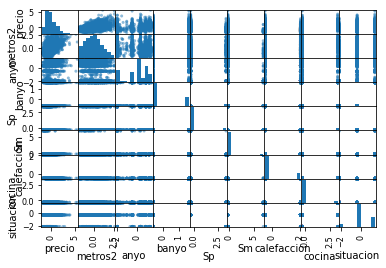

In [794]:
pd.plotting.scatter_matrix(A)
plt.show()

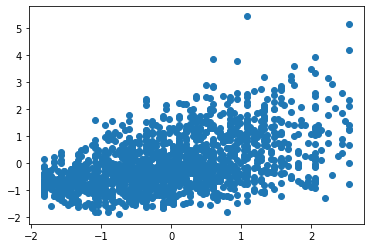

In [803]:
plt.scatter(A['metros2'],A['precio'], marker= 'o')
plt.show()
# No hay una indicacion que formen una linea. Esto sugiere que la regresion lineal tal vez no sea la mejor forma de entender estos datos. 

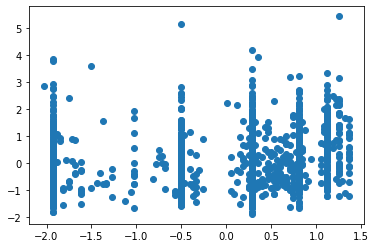

In [804]:
plt.scatter(A['anyo'],A['precio'], marker= 'o')
plt.show()
# Esta variable empieza a sugerir la existencia de cluster en el set de datos. 

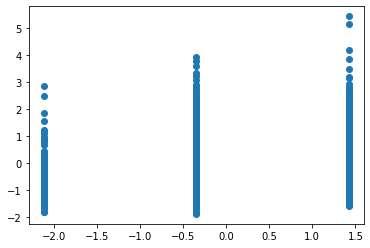

In [805]:
plt.scatter(A['situacion'],A['precio'], marker= 'o')
plt.show()
# Esta variable empieza a sugerir la existencia de cluster en el set de datos. 

In [806]:
A['situacion'].value_counts()
# Hay un claro desbalanceo en estas categorias estudiadas. La gran mayoria de datos pertenecen a la categoria 2 con 1010 datos de 1576 datos (64% aproximadamente).

-0.344969    1010
 1.420197     437
-2.110135     129
Name: situacion, dtype: int64

<AxesSubplot:>

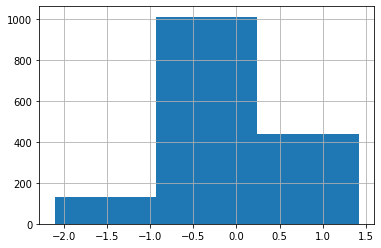

In [807]:
A['situacion'].hist(bins =3)

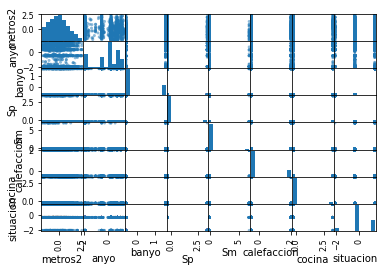

In [548]:
pd.plotting.scatter_matrix(X)
plt.show()

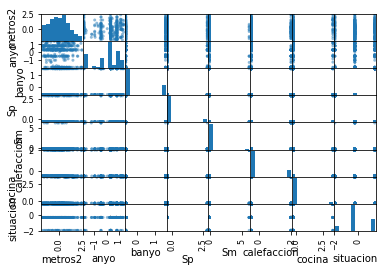

In [549]:

pd.plotting.scatter_matrix(Z)
plt.show()

#### 5. Correlacion

In [550]:
A_corr = A.corr()
A_corr

,precio,metros2,anyo,banyo,Sp,Sm,calefaccion,cocina,situacion
precio,1.000000,0.480936,0.137014,0.163018,-0.133054,-0.149199,-0.279793,0.240701,0.193201
metros2,0.480936,1.000000,-0.150703,0.033845,0.002084,-0.091872,-0.031433,0.164347,0.025736
anyo,0.137014,-0.150703,1.000000,0.049603,-0.036001,-0.211112,-0.411784,0.038050,0.056616
banyo,0.163018,0.033845,0.049603,1.000000,-0.184944,0.005584,-0.123816,0.102803,0.879686
Sp,-0.133054,0.002084,-0.036001,-0.184944,1.000000,-0.028405,0.056593,-0.022219,-0.630044
Sm,-0.149199,-0.091872,-0.211112,0.005584,-0.028405,1.000000,0.223679,-0.044523,0.018157
calefaccion,-0.279793,-0.031433,-0.411784,-0.123816,0.056593,0.223679,1.000000,-0.101599,-0.125224
cocina,0.240701,0.164347,0.038050,0.102803,-0.022219,-0.044523,-0.101599,1.000000,0.091986
situacion,0.193201,0.025736,0.056616,0.879686,-0.630044,0.018157,-0.125224,0.091986,1.000000


<AxesSubplot:>

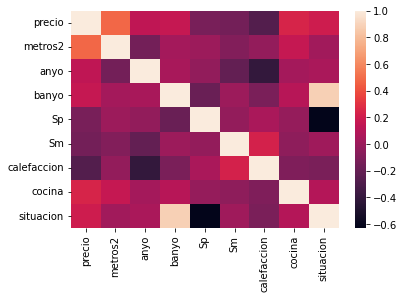

In [551]:
sns.heatmap(A_corr, xticklabels = A.columns, yticklabels = A.columns)

Las 3 correlaciones mas relevantes son:
(i) 'banyo' y 'situacion' tienen una correlacion positiva importante (88% aproximadamente), lo que sugiere que entre mas baños haya en el inmueble la situacion general de este mejora, perteneciendo a una mejor categoria en la variable 'situacion'.

(ii) 'Sp' y 'situacion' tiene una correlacion negativa relevante (-63% aproximadamente), por lo que a mayor Sp, peor categoria se tendra en 'situacion'.

(iii) 'precio' esta correlacionado de manera importante con los metros cuadrados (48% aproximadamente). Esto sugiere que entre mayor metros cuadrados tenga un inmueble su precio podría ser mayor.


In [552]:
X_corr = X.corr()
X_corr

,metros2,anyo,banyo,Sp,Sm,calefaccion,cocina,situacion
metros2,1.000000,-0.150703,0.033845,0.002084,-0.091872,-0.031433,0.164347,0.025736
anyo,-0.150703,1.000000,0.049603,-0.036001,-0.211112,-0.411784,0.038050,0.056616
banyo,0.033845,0.049603,1.000000,-0.184944,0.005584,-0.123816,0.102803,0.879686
Sp,0.002084,-0.036001,-0.184944,1.000000,-0.028405,0.056593,-0.022219,-0.630044
Sm,-0.091872,-0.211112,0.005584,-0.028405,1.000000,0.223679,-0.044523,0.018157
calefaccion,-0.031433,-0.411784,-0.123816,0.056593,0.223679,1.000000,-0.101599,-0.125224
cocina,0.164347,0.038050,0.102803,-0.022219,-0.044523,-0.101599,1.000000,0.091986
situacion,0.025736,0.056616,0.879686,-0.630044,0.018157,-0.125224,0.091986,1.000000


<AxesSubplot:>

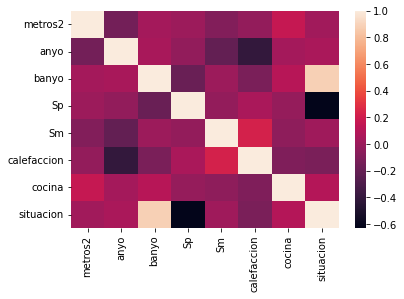

In [553]:
sns.heatmap(X_corr, xticklabels = X.columns, yticklabels = X.columns)


In [554]:
Z_corr = Z.corr()
Z_corr

,metros2,anyo,banyo,Sp,Sm,calefaccion,cocina,situacion
metros2,1.000000,-0.119096,0.014407,0.062444,-0.042205,0.013187,0.211210,-0.021464
anyo,-0.119096,1.000000,0.112310,-0.104070,-0.222403,-0.426442,0.051569,0.137869
banyo,0.014407,0.112310,1.000000,-0.222669,-0.066950,-0.097772,0.064374,0.863957
Sp,0.062444,-0.104070,-0.222669,1.000000,-0.004873,0.126464,0.048631,-0.683299
Sm,-0.042205,-0.222403,-0.066950,-0.004873,1.000000,0.319615,-0.047285,-0.047624
calefaccion,0.013187,-0.426442,-0.097772,0.126464,0.319615,1.000000,-0.007278,-0.138548
cocina,0.211210,0.051569,0.064374,0.048631,-0.047285,-0.007278,1.000000,0.023092
situacion,-0.021464,0.137869,0.863957,-0.683299,-0.047624,-0.138548,0.023092,1.000000


<AxesSubplot:>

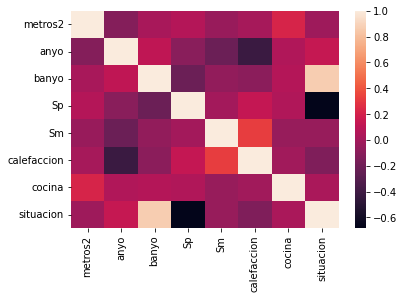

In [555]:
sns.heatmap(Z_corr, xticklabels = Z.columns, yticklabels = Z.columns)

Los graficos de correlaciones, como las revisiones graficas de colienalidad, sugieren que Z y X mantienen de manera general sus distribucion y relaciones entre las variables. En caso de que el modelo se ajuste bien a los datos de entrenamiento, lo mas probable es que la prediccion se pueda realizar de manera exitosa.

#### 6. Covarianza

In [557]:
np.set_printoptions(precision=3, suppress = True)
print(A_cov)

[[ 1.001  0.481  0.137  0.163 -0.133 -0.149 -0.28   0.241  0.193]
 [ 0.481  1.001 -0.151  0.034  0.002 -0.092 -0.031  0.164  0.026]
 [ 0.137 -0.151  1.001  0.05  -0.036 -0.211 -0.412  0.038  0.057]
 [ 0.163  0.034  0.05   1.001 -0.185  0.006 -0.124  0.103  0.88 ]
 [-0.133  0.002 -0.036 -0.185  1.001 -0.028  0.057 -0.022 -0.63 ]
 [-0.149 -0.092 -0.211  0.006 -0.028  1.001  0.224 -0.045  0.018]
 [-0.28  -0.031 -0.412 -0.124  0.057  0.224  1.001 -0.102 -0.125]
 [ 0.241  0.164  0.038  0.103 -0.022 -0.045 -0.102  1.001  0.092]
 [ 0.193  0.026  0.057  0.88  -0.63   0.018 -0.125  0.092  1.001]]


In [558]:
X_arr = X.to_numpy()
X_cov = np.cov(X_arr.T)
np.shape(X_cov)

(8, 8)

In [559]:
np.set_printoptions(precision=2, suppress = True)
print(X_cov)

[[ 1.   -0.15  0.03  0.   -0.09 -0.03  0.16  0.03]
 [-0.15  1.    0.05 -0.04 -0.21 -0.41  0.04  0.06]
 [ 0.03  0.05  1.   -0.19  0.01 -0.12  0.1   0.88]
 [ 0.   -0.04 -0.19  1.   -0.03  0.06 -0.02 -0.63]
 [-0.09 -0.21  0.01 -0.03  1.    0.22 -0.04  0.02]
 [-0.03 -0.41 -0.12  0.06  0.22  1.   -0.1  -0.13]
 [ 0.16  0.04  0.1  -0.02 -0.04 -0.1   1.    0.09]
 [ 0.03  0.06  0.88 -0.63  0.02 -0.13  0.09  1.  ]]


In [560]:
Z_arr = Z.to_numpy()
Z_cov = np.cov(Z_arr.T)
np.shape(Z_cov)

(8, 8)

In [561]:
np.set_printoptions(precision=3, suppress = True)
print(Z_cov)

[[ 1.003 -0.119  0.014  0.063 -0.042  0.013  0.212 -0.022]
 [-0.119  1.003  0.113 -0.104 -0.223 -0.428  0.052  0.138]
 [ 0.014  0.113  1.003 -0.223 -0.067 -0.098  0.065  0.866]
 [ 0.063 -0.104 -0.223  1.003 -0.005  0.127  0.049 -0.685]
 [-0.042 -0.223 -0.067 -0.005  1.003  0.32  -0.047 -0.048]
 [ 0.013 -0.428 -0.098  0.127  0.32   1.003 -0.007 -0.139]
 [ 0.212  0.052  0.065  0.049 -0.047 -0.007  1.003  0.023]
 [-0.022  0.138  0.866 -0.685 -0.048 -0.139  0.023  1.003]]


Los datos obtenidos en la covarianza con datos escalados confirman los datos obtenidos en las correlaciones. 

En otras palabras la correlacion es el calculo de la covarianza con datos escalados y estandarizados.

#### 7. Componentes principales

##### 7.1 Calculo de Autovalores y seleccion de Autovectores

In [562]:
[W,V] = np.linalg.eigh(X_cov)
# W: Son los autovales (Eigenvalues)
# V: Son los autovectores (Eigenvectors)

In [563]:
np.round_(W,2)
# Los dos ultimos autovalores son los de mayor valor de ellos se obtendran las dos componentes principales para realizar un grafico en 2 dimensiones.

array([-0.  ,  0.55,  0.74,  0.82,  0.9 ,  1.21,  1.55,  2.25])

In [564]:
np.round_(100*W/sum(W),2)
# El ultimo autovector representa el 28.05% de todos los datos.
# El penultimo autovector  representa el 19.40% de todos los datos. 
# Estos dos autovectores juntos representan el 47.45% de los datos. 
# Esto indica que para llegar al menos a un 60% de representacion de los datos se debe incluir un tecer autovector (+15.06%).

array([-0.  ,  6.83,  9.28, 10.19, 11.2 , 15.06, 19.4 , 28.05])

In [565]:
np.round_(9.28+ 10.19+ 11.2+ 15.06+ 19.4+ 28.05, 2)
# 6 variables deben ser escogidas por su corr y cov para modelar el precio de las viviendas

93.18

In [566]:
np.round(V,2)
# Los autovectores ayudan a proyectar los datos en 2 o 3 dimensiones y a identificar posibles cluster de datos,
# para comprender mejor los datos.

array([[-0.  ,  0.3 ,  0.48, -0.05, -0.35,  0.74,  0.03, -0.04],
       [-0.  ,  0.71,  0.13, -0.08,  0.18, -0.28, -0.59, -0.14],
       [-0.58,  0.05, -0.01,  0.57,  0.07,  0.03,  0.12, -0.56],
       [ 0.35,  0.03,  0.06,  0.77,  0.22,  0.13, -0.15,  0.43],
       [-0.  ,  0.07,  0.62, -0.11,  0.57, -0.19,  0.48,  0.05],
       [-0.  ,  0.63, -0.46,  0.03, -0.08,  0.  ,  0.58,  0.21],
       [ 0.  , -0.03, -0.38, -0.21,  0.68,  0.56, -0.12, -0.13],
       [ 0.73,  0.02, -0.04,  0.08, -0.05, -0.04,  0.17, -0.65]])

In [567]:
AuVec1 = V[:,7]
print(AuVec1)
AuVec2 = V[:,6]
print(AuVec2)

[-0.037 -0.14  -0.56   0.427  0.047  0.207 -0.13  -0.649]
[ 0.027 -0.594  0.118 -0.152  0.481  0.579 -0.122  0.167]


In [568]:
AuVec1 = AuVec1.reshape(8,1)
AuVec2 = AuVec2.reshape(8,1)

##### 7.2 Conversion de la Matrix X en sus dos componentes principales

In [569]:
P_1 = X @ AuVec1
P_2 = X @ AuVec2

Text(0.5, 1.0, 'Componentes principales')

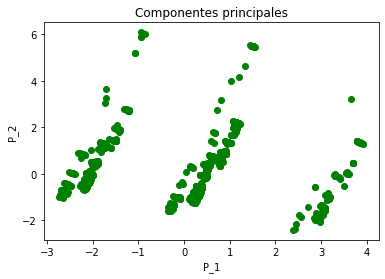

In [570]:
plt.scatter(P_1, P_2, color='green')
# naming the x axis
plt.xlabel('P_1')
# naming the y axis
plt.ylabel('P_2')
# giving a title to my graph
plt.title('Componentes principales')

Esta grafica sugiere que la variable 'situacion' con ayuda de 'anyos' y las demas variables categoricas podria estar separando en 3 cluster los datos estudiados. Esto sugiere que este set de datos posiblemente sea mas conveniente entenderlo desde un problema de clasificacion y no de regresion.

### (iv) Modelacion

Los datos sugieren que estos datos deben entenderse como un problema de clasificacion, por lo que seria importante convertir los datos de precios en categorias para clasificar los inmuebles por rango de precios. Sin embargo se requiere un modelo matematico que pueda calcular el precio del inmueble con las variables estudiadas. Para ello se estudiara el comportamiento de cada uno de los modelos lineales e indicar cual seria el que mejor se ajusta a los datos. 

#### 1. Regresion Lineal

##### a. Encontrando el mejor modelo con Ordinary Least Squares

Definicion de X para realizar la regresion lineal con OLS, descartando las variables de menor influencia o representacion de los datos (Sp y anyo) con base en las correlaciones y valores de covarianza encontrados.

In [571]:
X

,metros2,anyo,banyo,Sp,Sm,calefaccion,cocina,situacion
0,-0.850618,0.805207,-0.619411,-0.29858,-0.14849,-0.493845,-0.299839,-0.344969
1,-0.657124,0.805207,-0.619411,-0.29858,-0.14849,-0.493845,-0.299839,-0.344969
2,0.116851,0.805207,-0.619411,-0.29858,-0.14849,-0.493845,-0.299839,-0.344969
3,-0.608750,-1.922353,-0.619411,-0.29858,-0.14849,-0.493845,-0.299839,-0.344969
4,-1.044112,0.287316,-0.619411,-0.29858,-0.14849,2.024926,-0.299839,-0.344969
...,...,...,...,...,...,...,...,...
1571,1.181067,0.287316,1.614437,-0.29858,-0.14849,-0.493845,-0.299839,1.420197
1572,-0.753871,0.874259,1.614437,-0.29858,-0.14849,-0.493845,-0.299839,1.420197
1573,-1.818087,0.528998,1.614437,-0.29858,-0.14849,-0.493845,-0.299839,1.420197
1574,-0.850618,0.701629,1.614437,-0.29858,-0.14849,-0.493845,-0.299839,1.420197


In [572]:
X_lin = X[['metros2','calefaccion','cocina','situacion','banyo','Sm']]
#X_lin

In [573]:
X_train = np.array(X_lin)
Y_train = np.array(Y)

In [574]:
# Ordinary Least Squares regression (OLS)
# fit the model
lr = sm.OLS(Y_train, X_train).fit()

# Printing the parameters
lr.params
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.344
Model:                            OLS   Adj. R-squared (uncentered):              0.342
Method:                 Least Squares   F-statistic:                              137.4
Date:                Wed, 14 Sep 2022   Prob (F-statistic):                   4.91e-140
Time:                        03:01:20   Log-Likelihood:                         -1903.7
No. Observations:                1576   AIC:                                      3819.
Df Residuals:                    1570   BIC:                                      3852.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4445      0.021     21.369      0.000       0.404       0.485
x2            -0.2232      0.021    -10.512      0.000      -0.265      -0.182
x3             0.1311      0.021      6.274      0.000       0.090       0.172
x4             0.2144      0.043      4.983      0.000       0.130       0.299
x5            -0.0814      0.043     -1.892      0.059      -0.166       0.003
x6            -0.0560      0.021     -2.659      0.008      -0.097      -0.015
==============================================================================
Omnibus:                      129.773   Durbin-Watson:                   1.660
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              205.874
Skew:                           0.613   Prob(JB):                     1.97e-45
Kurtosis:                       4.278   Cond. No.                         4.03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Se encuentra que X4: 'banyo' tiene colinealidad con alguna variable del data set (P > 0.05). Lo mas probable es que sea con la variable 'situacion' (correlacion 88% aproximadamente). Por ello 'banyo' debe removerse de X_lin.

Se entrena nuevamente el modelo OLS esta vez sin la variable 'banyo':

In [575]:
X_lin = X[['metros2','calefaccion','cocina','situacion','Sm']]
X_train = np.array(X_lin)
Y_train = np.array(Y)
lr = sm.OLS(Y_train, X_train).fit()
lr.params
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.343
Model:                            OLS   Adj. R-squared (uncentered):              0.341
Method:                 Least Squares   F-statistic:                              163.9
Date:                Wed, 14 Sep 2022   Prob (F-statistic):                   2.16e-140
Time:                        03:01:20   Log-Likelihood:                         -1905.5
No. Observations:                1576   AIC:                                      3821.
Df Residuals:                    1571   BIC:                                      3848.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4439      0.021     21.326      0.000       0.403       0.485
x2            -0.2224      0.021    -10.466      0.000      -0.264      -0.181
x3             0.1295      0.021      6.198      0.000       0.089       0.171
x4             0.1430      0.021      6.906      0.000       0.102       0.184
x5            -0.0555      0.021     -2.632      0.009      -0.097      -0.014
==============================================================================
Omnibus:                      129.543   Durbin-Watson:                   1.653
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              202.936
Skew:                           0.617   Prob(JB):                     8.57e-45
Kurtosis:                       4.253   Cond. No.                         1.38
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Ya no hay ninguna colinealidad entre las variables independientes, sin embargo el resultado de Adj. R-squared (<0.5) sugiere que el porcentaje de variation de la variable dependiente explicado por las variables independientes es bajo. En otras palabras este modelo no se ajusta bien a los datos.

Se toma otra aproximacion utilizando todas las variables de para ver si mejor el ajuste de los datos al modelo de OLS, excepto la variable 'banyo' (debido a que acarrea colinealidad con otras variables del data set).

In [576]:
X_lin_2 = X[['metros2','calefaccion','cocina','situacion','Sm','Sp','anyo']]
X_train = np.array(X_lin_2)
Y_train = np.array(Y)
lr = sm.OLS(Y_train, X_train).fit()
lr.params
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.354
Model:                            OLS   Adj. R-squared (uncentered):              0.351
Method:                 Least Squares   F-statistic:                              122.8
Date:                Wed, 14 Sep 2022   Prob (F-statistic):                   5.45e-144
Time:                        03:01:20   Log-Likelihood:                         -1892.0
No. Observations:                1576   AIC:                                      3798.
Df Residuals:                    1569   BIC:                                      3835.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4644      0.021     22.055      0.000       0.423       0.506
x2            -0.1807      0.023     -7.916      0.000      -0.225      -0.136
x3             0.1287      0.021      6.201      0.000       0.088       0.169
x4             0.1108      0.026      4.192      0.000       0.059       0.163
x5            -0.0403      0.021     -1.903      0.057      -0.082       0.001
x6            -0.0483      0.026     -1.844      0.065      -0.100       0.003
x7             0.1112      0.023      4.851      0.000       0.066       0.156
==============================================================================
Omnibus:                      144.507   Durbin-Watson:                   1.647
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              238.936
Skew:                           0.652   Prob(JB):                     1.31e-52
Kurtosis:                       4.392   Cond. No.                         2.19
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

El resultado arroja que las variables 'Sp' y 'Sm' tambien acarrean colinealidad (P>0.05). Lo mas probable es que sea con la variable 'situacion', ya que esta ultima es un resumen de las variables 'Sp' y 'Sm'.

Se proceden a remover del set de datos 'Sp' y 'Sm'. Se corre nuevamente el modelo.

In [577]:
X_lin_2 = X[['metros2','calefaccion','cocina','situacion','anyo']]
X_train = np.array(X_lin_2)
Y_train = np.array(Y)
lr = sm.OLS(Y_train, X_train).fit()
lr.params
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.351
Model:                            OLS   Adj. R-squared (uncentered):              0.349
Method:                 Least Squares   F-statistic:                              170.0
Date:                Wed, 14 Sep 2022   Prob (F-statistic):                   9.88e-145
Time:                        03:01:20   Log-Likelihood:                         -1895.4
No. Observations:                1576   AIC:                                      3801.
Df Residuals:                    1571   BIC:                                      3828.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4684      0.021     22.352      0.000       0.427       0.509
x2            -0.1859      0.023     -8.223      0.000      -0.230      -0.142
x3             0.1275      0.021      6.138      0.000       0.087       0.168
x4             0.1394      0.021      6.784      0.000       0.099       0.180
x5             0.1183      0.023      5.216      0.000       0.074       0.163
==============================================================================
Omnibus:                      144.828   Durbin-Watson:                   1.641
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              236.306
Skew:                           0.658   Prob(JB):                     4.86e-52
Kurtosis:                       4.366   Cond. No.                         1.65
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Este es el conjunto de variables de X que representa de mejor manera a la variable dependiente Y: 'precios'

##### b. Se crea un training y test split del mismo X para validar luego el error de la prediccion usando RMSE

In [578]:
Xtrain,Xtest,Ytrain, Ytest =train_test_split(X[['metros2','calefaccion','cocina','situacion','anyo']], Y, test_size = 0.3)

##### c. Por medio de un Pipeline se valida que tan bien esta entrenado el modelo

In [579]:
pipeline = make_pipeline(LinearRegression())
pipeline.fit(Xtrain, Ytrain)

Pipeline(steps=[('linearregression', LinearRegression())])

In [580]:
Ytrain_pred = pipeline.predict(Xtrain)
Ytest_pred = pipeline.predict(Xtest)

In [581]:
RMSE_train = math.sqrt(mean_squared_error(Ytrain, Ytrain_pred))
np.round_(RMSE_train,4)

0.8278

In [582]:
RMSE_test = math.sqrt(mean_squared_error(Ytest, Ytest_pred))
np.round_(RMSE_test,4)

0.7525

In [583]:
np.round_(pipeline.score(Xtrain,Ytrain),4), np.round_(pipeline.score(Xtest,Ytest),4)

(0.337, 0.3854)

El RMSE arrojado por estos modelos lineales (>= 80%) confirma que la regresion lineal NO es opcion viable para los datos estudiados.

#### 2. Regresion Ridge

In [584]:
Xtrain,Xtest,Ytrain, Ytest =train_test_split(X[['metros2','calefaccion','cocina','situacion','anyo']], Y, test_size = 0.3)

In [585]:
pipeline = make_pipeline(Ridge(alpha=1.0))
pipeline.fit(Xtrain, Ytrain)

Pipeline(steps=[('ridge', Ridge())])

In [586]:
Ytrain_pred = pipeline.predict(Xtrain)
Ytest_pred = pipeline.predict(Xtest)

In [587]:
RMSE_train = math.sqrt(mean_squared_error(Ytrain, Ytrain_pred))
np.round_(RMSE_train,4)

0.7933

In [588]:
RMSE_test = math.sqrt(mean_squared_error(Ytest, Ytest_pred))
np.round_(RMSE_test,4)

0.8364

In [589]:
np.round_(pipeline.score(Xtrain,Ytrain),4), np.round_(pipeline.score(Xtest,Ytest),4)

(0.3532, 0.3401)

La regresion Ridge no mejoro los resultados obtenidos con el modelo OLS. El RMSE sigue en 80% aproximadamente. 
Al cambiar alpha en la regresion Ridge 

In [590]:
pipeline = make_pipeline(Ridge(alpha=0.5))
pipeline.fit(Xtrain, Ytrain)
Ytrain_pred = pipeline.predict(Xtrain)
Ytest_pred = pipeline.predict(Xtest)

In [591]:
RMSE_train = math.sqrt(mean_squared_error(Ytrain, Ytrain_pred))
np.round_(RMSE_train,4)

0.7933

In [592]:
RMSE_test = math.sqrt(mean_squared_error(Ytest, Ytest_pred))
np.round_(RMSE_test,4)

0.8364

In [593]:
np.round_(pipeline.score(Xtrain,Ytrain),4), np.round_(pipeline.score(Xtest,Ytest),4)

(0.3532, 0.3401)

#### 3. Regresion Lasso

In [594]:
Xtrain,Xtest,Ytrain, Ytest =train_test_split(X[['metros2','calefaccion','cocina','situacion','anyo']], Y, test_size = 0.3)

In [595]:
lasso = Lasso(alpha=1)
lasso.fit(Xtrain,Ytrain)

Lasso(alpha=1)

In [596]:
Ytrain_pred = lasso.predict(Xtrain)
Ytest_pred = lasso.predict(Xtest)

In [597]:
RMSE_train = math.sqrt(mean_squared_error(Ytrain, Ytrain_pred))
np.round_(RMSE_train,4)

0.9949

In [598]:
RMSE_test = math.sqrt(mean_squared_error(Ytest, Ytest_pred))
np.round_(RMSE_test,4)

1.0125

In [599]:
np.round_(lasso.score(Xtrain,Ytrain),4), np.round_(lasso.score(Xtest,Ytest),4)

(0.0, -0.004)

Los resultados entregados por Lasso, fueron mucho peores que los de las otras dos regresiones lineales. Confirmado, la regresion lineal no es un buen ajuste para los datos estudiados. Cambiando el valor de alpha en la regresion lasso no genera cambios significativos en el RMSE.

#### 4. Regresion Lasso + Cross Validation

In [600]:
Xtrain,Xtest,Ytrain, Ytest =train_test_split(X[['metros2','calefaccion','cocina','situacion','anyo']], Y, test_size = 0.3)

In [601]:
lasso_cv = LassoCV(cv=5)

In [602]:
lasso_cv.fit(Xtrain, Ytrain)

C:\Users\luisc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:1572: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LassoCV(cv=5)

In [603]:
Ytrain_pred = lasso_cv.predict(Xtrain)
Ytest_pred = lasso_cv.predict(Xtest)

In [604]:
RMSE_train = math.sqrt(mean_squared_error(Ytrain, Ytrain_pred))
np.round_(RMSE_train,4)

0.8152

In [605]:
RMSE_test = math.sqrt(mean_squared_error(Ytest, Ytest_pred))
np.round_(RMSE_test,4)

0.7829

In [606]:
np.round_(lasso_cv.score(Xtrain,Ytrain),4), np.round_(lasso_cv.score(Xtest,Ytest),4)

(0.3517, 0.3487)

Con 5 pasos en el Cross Validation, la regresion lasso mejora su resultado original, pero no mejora el ajuste a los datos obtenido por la regresion lineal sencilla y Ridge.

#### 5. Non-linear regression

In [607]:
Xtrain,Xtest,Ytrain, Ytest =train_test_split(X[['metros2','calefaccion','cocina','situacion','anyo']], Y, test_size = 0.3)

In [608]:
print(pyearth.__version__)

0.1.0


In [609]:
model = pyearth.Earth()

In [610]:
model.fit(Xtrain, Ytrain)

C:\Users\luisc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pyearth\earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
C:\Users\luisc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pyearth\earth.py:1055: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coef, resid = np.linalg.lstsq(B, weighted_y[:, i])[0:2]


Earth()

In [611]:
Ytrain_pred = model.predict(Xtrain)
Ytest_pred = model.predict(Xtest)

In [612]:
print(model.summary())

Earth Model
-----------------------------------------
Basis Function      Pruned  Coefficient  
-----------------------------------------
(Intercept)         No      0.0105773    
metros2             No      0.452244     
calefaccion         No      -0.176682    
situacion           No      0.147212     
anyo                No      0.141925     
cocina              No      0.12129      
h(metros2-2.34203)  Yes     None         
h(2.34203-metros2)  Yes     None         
-----------------------------------------
MSE: 0.6678, GCV: 0.6844, RSQ: 0.3459, GRSQ: 0.3308


In [613]:
RMSE_train = math.sqrt(mean_squared_error(Ytrain, Ytrain_pred))
np.round_(RMSE_train,4)

0.8172

In [614]:
RMSE_test = math.sqrt(mean_squared_error(Ytest, Ytest_pred))
np.round_(RMSE_test,4)

0.78

#### 6. Nonlinear + Cross Validation

In [615]:
Xtrain,Xtest,Ytrain, Ytest =train_test_split(X[['metros2','calefaccion','cocina','situacion','anyo']], Y, test_size = 0.3)

In [616]:
cv = RepeatedKFold(n_splits=100, n_repeats=10, random_state=42)
n_scores = cross_val_score(model, Xtrain, Ytrain, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)

In [617]:
print('RMSE: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

RMSE: -0.774 (0.188)


In [787]:
cv = RepeatedKFold(n_splits=100, n_repeats=10, random_state=42)
n_scores = cross_val_score(model, Xtest, Ytest, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)

In [788]:
print('RMSE: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

RMSE: -0.724 (0.255)


Nota: En este caso no se pueden utilizar: logistic regression y decision trees porque la variable dependiente Y (en este caso 'precios') es una variable numerica continua (no categorica como se requiere para dichos modelos). 

#### 7. Support Vector Machine (SVM)

In [729]:
Xtrain,Xtest,Ytrain, Ytest =train_test_split(X[['metros2','calefaccion','cocina','situacion','anyo']], Y, test_size = 0.3)


In [730]:
regr = svm.SVR()

In [731]:
regr.fit(Xtrain, Ytrain)

C:\Users\luisc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [732]:
Ytrain_pred = regr.predict(Xtrain)
Ytest_pred = regr.predict(Xtest)

In [733]:
RMSE_train = math.sqrt(mean_squared_error(Ytrain, Ytrain_pred))
np.round_(RMSE_train,4)

0.7952

In [734]:
RMSE_test = math.sqrt(mean_squared_error(Ytest, Ytest_pred))
np.round_(RMSE_test,4)

0.7483

### (v) Comparacion de Modelos

Todos los modelos utilizados arrojaron un RMSE para set de training cercano al 80% aproximadamente.
Los modelos que mejor se comportaron fueron Non-Lin+CV y SVM con RMSE para el grupo de datos de test < 75%.

A continuación se presentan los resultados de RMSE (train y test) obtenidos para cada modelo (organizados con base en RMSE test):

In [810]:
#Resumen_Reg = {'Modelo': ['Lineal', 'Ridge', 'Lasso', 'Lasso+CV','Non-Linear','Non-Lin+CV','SVM'],
 #       'RMSE train': [0.8278, 0.7933, 0.9949, 0.8152,0.8172 ,0.774 , 0.7952  ], 
 #       'RMSE test': [0.7525, 0.8364, 1.0125, 0.7829,0.7800 ,0.724, 0.7483]}
Resumen_Reg = {'Modelo': ['Non-Lin+CV','SVM','Lineal', 'Lasso+CV','Non-Linear','Ridge','Lasso'],
        'RMSE train': [0.774, 0.7952, 0.8278,  0.8152,0.8172, 0.7933, 0.9949], 
        'RMSE test': [0.7240, 0.7483, 0.7525, 0.7829,0.7800, 0.8364, 1.0125]}
Resumen_Reg = pd.DataFrame(Resumen_Reg)
Resumen_Reg

,Modelo,RMSE train,RMSE test
0,Non-Lin+CV,0.7740,0.7240
1,SVM,0.7952,0.7483
2,Lineal,0.8278,0.7525
3,Lasso+CV,0.8152,0.7829
4,Non-Linear,0.8172,0.7800
5,Ridge,0.7933,0.8364
6,Lasso,0.9949,1.0125


### (vi) Recomendaciones

Por los resultados obtenidos no se recomienda ninguno de estos modelos para predecir el precio de los inmuebles estudiados.
Esto puede ser debido a varias razones:

(1) En las categorias de variables como 'situacion' hay un desbalance en los datos encontrados (hay mayor cantidad de datos de la categoria 2).

(2) La variable 'metros2' a pesar de tener una distribucion normal y una correlacion relevante con 'precios' (48% aproximadamente), sus datos no describen una recta al relacionarse con 'precios'.

(3) La gran mayoria de variables que se relacionan con 'precios' son  variables categoricas (excepto 'anyo' y 'metros2'), haciendo complejo su relacionamiento por el desbalance existente entre categorias. 

(4) Adicionalmente las correlaciones (utilizando el modelo de Pearson) mostraron valores muy bajos con la variable dependiente.

Sin embargo, por el momento el mejor modelo para el set de datos estudiados es el No-Lin+CV. Sin embargo como los precios del set de datos Z no se tienen, si se quieren calcular no se puede usar el modelo No-Lin+CV, se debe usar SVM. Este ultimo modelo mencionado (SVM) se utilizara para predecir los precios de los inmuebles:

In [ ]:
Z_mod = Z[['metros2','calefaccion','cocina','situacion','anyo']]
W_pred = regr.predict(Z_mod)

In [ ]:
 W_pred_df = pd.DataFrame(W_pred)
 W_pred_df

In [ ]:
precio_mean = bd_train[['precio']].mean()
precio_std = bd_train[['precio']].std()
print(precio_mean,precio_std)

In [ ]:
 precio_mean = precio_mean.to_numpy()
 precio_std = precio_std.to_numpy()
 W_pred = W_pred.reshape(393,1)

In [ ]:
Precio_pred = (precio_std*W_pred)+precio_mean
#Precio_pred
Precio_pred = pd.DataFrame(Precio_pred)


In [ ]:
Precio_pred.columns = ['Precio Predecido']

In [ ]:
Precio_pred.to_excel('precios_pred.xlsx', sheet_name='sheet1', index=False)

Para mejorar este set de datos se sugiere agregar las siguientes variables:

(1) Estrato social;

(2) Es nuevo o usado;

(3) Numero de habitaciones;

(4) Costo de los servicios publicos;

(5) Tipo de vivienda (apartamento, casa, aparta estudio, otro);

(6) Parqueadero;

(7) Si tiene o no equipamiento aledaño (Centro comercial, hospital, parques, otro);

(8) Si tiene o no proyeccion en el POT (esto aplicaria para el caso colombiano);

(9) Si es una unidad residencial;

(10) cuenta con zonas sociales, piscina, otro.

Para obtener un modelo predictivo de los precios, se sugiere convertir la variable precios (numerica continua) en un figura categorica. Con ello, los rangos de precios se convertirian en categorias y se podria identificar un inmueble en que categoria de precios se ubica. Ya dentro de esa categoria, se podría encontrar las variables numericas que permitan calcular el precio del inmueble. 

### (vii) Pendientes

1. Quitar las variables categoricas de los graficos de correlacion. Solamente dejar las numericas.
2. Remover duplicados. 
3. Convertir las variables precios, metros cuadrados y años en categorias. Modelar el problema con regresion logistica, Decision tree, random forest, XGBoost, ElasticNet
4. Revisar que significado tienen los residuales en la regresion lineal normal. 